# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [1]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


Training Set: torch.Size([2100, 2])
Validation Set: torch.Size([900, 2])
Starting Manual Training Protocol...
Epoch [200/3000] | Loss: 0.6759 | Val Loss: 0.6646 | Acc: 0.5833 | Val Acc: 0.6167
Epoch [400/3000] | Loss: 0.6612 | Val Loss: 0.6488 | Acc: 0.5833 | Val Acc: 0.6167
Epoch [600/3000] | Loss: 0.5396 | Val Loss: 0.5283 | Acc: 0.7114 | Val Acc: 0.7256
Epoch [800/3000] | Loss: 0.4608 | Val Loss: 0.4595 | Acc: 0.8119 | Val Acc: 0.8100
Epoch [1000/3000] | Loss: 0.4457 | Val Loss: 0.4509 | Acc: 0.8224 | Val Acc: 0.8200
Epoch [1200/3000] | Loss: 0.4269 | Val Loss: 0.4354 | Acc: 0.8257 | Val Acc: 0.8178
Epoch [1400/3000] | Loss: 0.3546 | Val Loss: 0.3720 | Acc: 0.8943 | Val Acc: 0.8711
Epoch [1600/3000] | Loss: 0.2953 | Val Loss: 0.3246 | Acc: 0.9262 | Val Acc: 0.9044
Epoch [1800/3000] | Loss: 0.2999 | Val Loss: 0.3401 | Acc: 0.9176 | Val Acc: 0.8722
Epoch [2000/3000] | Loss: 0.2926 | Val Loss: 0.3336 | Acc: 0.9210 | Val Acc: 0.8767
Epoch [2200/3000] | Loss: 0.2832 | Val Loss: 0.3239 | 

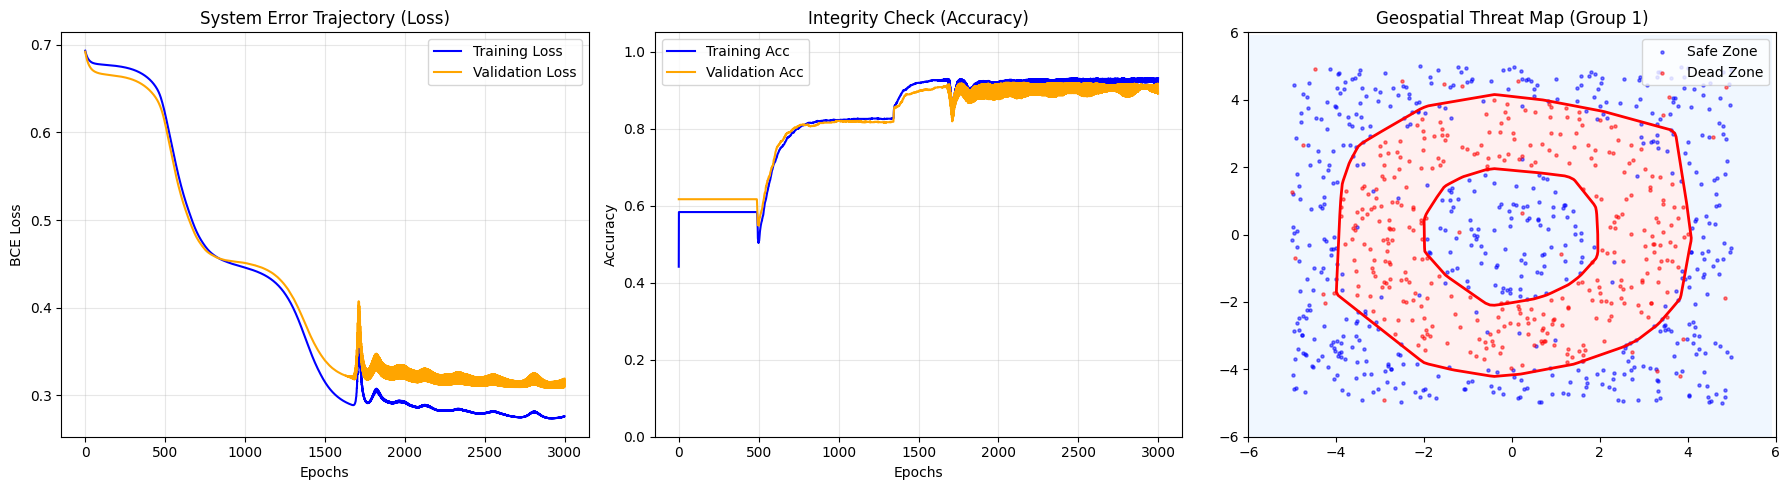


MISSION STATUS: ANALYSIS COMPLETE.


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ===========================================================
# PART 2: Data Preparation
# ===========================================================

# Ensure data is float32 for PyTorch stability
X_full = X_full.type(torch.float32)
y_full = y_full.type(torch.float32)

# Split data: 70% Train, 30% Validation
# Using sklearn for a clean shuffle and split
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_full.numpy(), y_full.numpy(), test_size=0.3, random_state=GROUP_NUMBER
)

# Convert back to PyTorch tensors
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
X_val = torch.tensor(X_val_np, dtype=torch.float32)
y_val = torch.tensor(y_val_np, dtype=torch.float32)

print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")

# ===========================================================
# PART 3: Architecture & Initialization (Manual)
# ===========================================================

# Architecture Config
input_dim = 2
hidden_dim = 16  # 16 Neurons per hidden layer
output_dim = 1

# Initialize Weights and Biases
# FIXED: We multiply by 0.1 first, THEN set requires_grad=True
# This ensures they are "Leaf Tensors" valid for the optimizer.
def init_param(shape):
    weights = torch.randn(shape, dtype=torch.float32) * 0.1
    weights.requires_grad_(True)
    return weights

# Layer 1 (Input -> Hidden 1)
W1 = init_param((input_dim, hidden_dim))
b1 = torch.zeros(hidden_dim, requires_grad=True)

# Layer 2 (Hidden 1 -> Hidden 2)
W2 = init_param((hidden_dim, hidden_dim))
b2 = torch.zeros(hidden_dim, requires_grad=True)

# Layer 3 (Hidden 2 -> Hidden 3)
W3 = init_param((hidden_dim, hidden_dim))
b3 = torch.zeros(hidden_dim, requires_grad=True)

# Output Layer (Hidden 3 -> Output)
W4 = init_param((hidden_dim, output_dim))
b4 = torch.zeros(output_dim, requires_grad=True)

# List of params for easy updating
params = [W1, b1, W2, b2, W3, b3, W4, b4]

# ===========================================================
# PART 4: Helper Functions (Forward, Loss, Metrics)
# ===========================================================

def manual_sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + torch.exp(-x))

def manual_relu(x):
    """ReLU activation function (max(0, x))"""
    return torch.maximum(torch.zeros_like(x), x)

def forward(X):
    """
    Forward pass through the 3-hidden-layer MLP.
    Structure: Input -> [Linear->ReLU]*3 -> Linear->Sigmoid -> Output
    """
    # Layer 1
    z1 = torch.matmul(X, W1) + b1
    a1 = manual_relu(z1)

    # Layer 2
    z2 = torch.matmul(a1, W2) + b2
    a2 = manual_relu(z2)

    # Layer 3
    z3 = torch.matmul(a2, W3) + b3
    a3 = manual_relu(z3)

    # Output Layer
    z4 = torch.matmul(a3, W4) + b4
    a4 = manual_sigmoid(z4)

    return a4

def manual_bce_loss(y_pred, y_true):
    """
    Manual Binary Cross Entropy Implementation.
    Formula: -1/N * sum(y*log(y_hat) + (1-y)*log(1-y_hat))
    """
    # Clamp to avoid log(0) which gives NaN
    y_pred = torch.clamp(y_pred, 1e-7, 1 - 1e-7)

    loss = -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return torch.mean(loss)

def calculate_accuracy(y_pred, y_true):
    """Computes accuracy based on 0.5 threshold"""
    predicted_classes = (y_pred >= 0.5).float()
    correct_predictions = (predicted_classes == y_true).sum()
    return correct_predictions / y_true.shape[0]

# ===========================================================
# PART 5: Training Loop (Gradient Descent)
# ===========================================================

# Hyperparameters
learning_rate = 0.1
epochs = 3000  # Increased slightly for better convergence

# History storage for plotting
history = {
    'train_loss': [], 'val_loss': [],
    'train_acc': [], 'val_acc': []
}

print("Starting Manual Training Protocol...")

for epoch in range(epochs):

    # --- Training Step ---
    # 1. Forward Pass
    y_train_pred = forward(X_train)

    # 2. Compute Loss
    loss = manual_bce_loss(y_train_pred, y_train)

    # 3. Compute Gradients (Backpropagation)
    loss.backward()

    # 4. Manual SGD Update
    # We use torch.no_grad() because weight updates shouldn't be tracked
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad
            # 5. Zero Gradients for next iteration
            param.grad.zero_()

    # --- Validation Step (No Gradient Needed) ---
    with torch.no_grad():
        y_val_pred = forward(X_val)
        val_loss = manual_bce_loss(y_val_pred, y_val)

        # Calculate Accuracies
        train_acc = calculate_accuracy(y_train_pred, y_train)
        val_acc = calculate_accuracy(y_val_pred, y_val)

    # Store metrics
    history['train_loss'].append(loss.item())
    history['val_loss'].append(val_loss.item())
    history['train_acc'].append(train_acc.item())
    history['val_acc'].append(val_acc.item())

    # Log progress every 200 epochs
    if (epoch + 1) % 200 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | "
              f"Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f} | "
              f"Acc: {train_acc.item():.4f} | Val Acc: {val_acc.item():.4f}")

# ===========================================================
# PART 6: The GDC Dashboard (Visual Output)
# ===========================================================

plt.figure(figsize=(18, 5))

# 1. System Error Trajectory (Loss Plot)
plt.subplot(1, 3, 1)
plt.plot(history['train_loss'], label='Training Loss', color='blue')
plt.plot(history['val_loss'], label='Validation Loss', color='orange')
plt.title('System Error Trajectory (Loss)')
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Integrity Check (Accuracy Plot)
plt.subplot(1, 3, 2)
plt.plot(history['train_acc'], label='Training Acc', color='blue')
plt.plot(history['val_acc'], label='Validation Acc', color='orange')
plt.title('Integrity Check (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Geospatial Threat Map (Decision Boundary)
plt.subplot(1, 3, 3)

# Create a meshgrid to map the entire area
x_min, x_max = -6, 6
y_min, y_max = -6, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten meshgrid for prediction
mesh_input = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict using trained model
with torch.no_grad():
    mesh_output = forward(mesh_input).reshape(xx.shape)

# Plot Decision Boundary (Contour at 0.5 probability)
plt.contourf(xx, yy, mesh_output, levels=[0, 0.5, 1], colors=['#e6f2ff', '#ffe6e6'], alpha=0.6)
plt.contour(xx, yy, mesh_output, levels=[0.5], colors='red', linewidths=2)

# Scatter actual validation data points
# Safe Zone (0) in Blue, Dead Zone (1) in Red
safe_idx = (y_val.squeeze() == 0)
dead_idx = (y_val.squeeze() == 1)

plt.scatter(X_val[safe_idx, 0], X_val[safe_idx, 1], c='blue', s=5, alpha=0.5, label='Safe Zone')
plt.scatter(X_val[dead_idx, 0], X_val[dead_idx, 1], c='red', s=5, alpha=0.5, label='Dead Zone')

plt.title(f'Geospatial Threat Map (Group {GROUP_NUMBER})')
plt.legend(loc='upper right')
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.tight_layout()
plt.show()

print("\nMISSION STATUS: ANALYSIS COMPLETE.")